Testing drawing ringed circle images inspired by https://openprocessing.org/sketch/1126082

The p5js uses a 'perlin noise' function https://p5js.org/reference/#/p5/noise

I found a python module for perlin noise here: https://pypi.org/project/perlin-noise/


In [1]:
pip install perlin-noise

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Importing the random module to choose random numbers 

Importing the PIL module for the drawing functions

In [1]:
import random
from PIL import Image, ImageDraw

Test 1: 

Create many ringed circles where each ring has slightly different shade of colour red. 

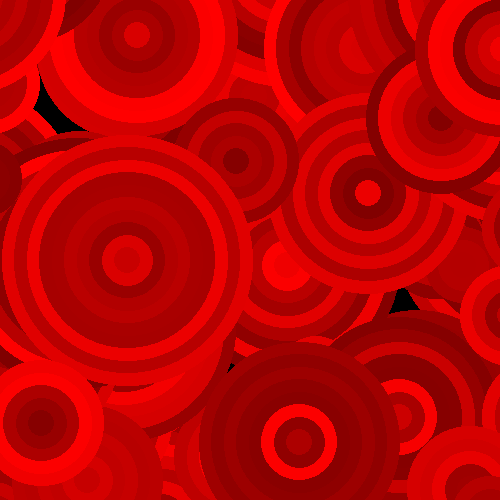

In [2]:

# w sets the width and height of image
w=500

# create a new image to draw on with width and height = w
im = Image.new('RGB', size=(w, w))
draw = ImageDraw.Draw(im)

# set the number of big circles
numCircles = 100

# loop to create each big circle one at a time
for i in range(0, numCircles, 1):
    
    # set the start x,y position for each circle at a random position
    # in the range of + / - 50 outside of the width of the image
    xStart = random.randint(-50, 550)
    yStart = random.randint(-50, 550)
    
    # each circle will have a number of rings
    # set this number randomly between 3 and 10 rings
    numRings = random.randint(3, 10)

    for x in range(numRings, 0, -1):
        for y in range(0, numRings, 1):

            mX=xStart
            mY=yStart
            
            # diameter of cirle for ring smaller for each loop 
            d=w*x/20
            r=d/2
            
            draw.ellipse(
                [(mX-r, mY-r), (mX+r, mY+r)],
                fill=(random.randint(128, 255), 0, 0)
            )

# show the image
im

Test 2

make the rings tighter together, or make this random between a range

make the rings switch between a shade of red and black

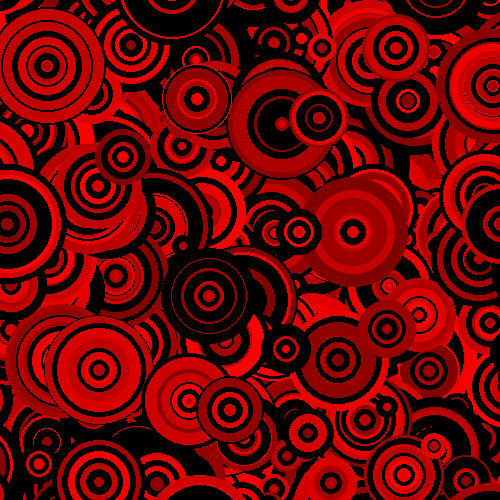

In [3]:

# w sets the width and height of image
w=500

# create a new image to draw on with width and height = w
im = Image.new('RGB', size=(w, w))
draw = ImageDraw.Draw(im)

# set the number of big circles
numCircles = 500

# loop to create each big circle one at a time
for i in range(0, numCircles, 1):
    
    # set the start x,y position for each circle at a random position
    # in the range of + / - 50 outside of the width of the image
    xStart = random.randint(-50, 550)
    yStart = random.randint(-50, 550)
    
    # each circle will have a number of rings
    # set this number randomly between 3 and 10 rings
    numRings = random.randint(3, 10)

    for x in range(numRings, 0, -1):
        for y in range(0, numRings, 1):

            mX=xStart
            mY=yStart
            
            # diameter of cirle for ring smaller for each loop
            # randomise how tight the rings are
            d=w*x/random.randint(40, 100)
            r=d/2
            
            # use a conditional check to switch the fill colour between red and black
            draw.ellipse(
                [(mX-r, mY-r), (mX+r, mY+r)],
                fill=((random.randint(128, 255), 0, 0) if x%2 else (0, 0, 0))
            )

# show the image
im

Test 3

Try using the noise like it was used in https://openprocessing.org/sketch/1126082

try adding the noise to the x,y positions for each ring

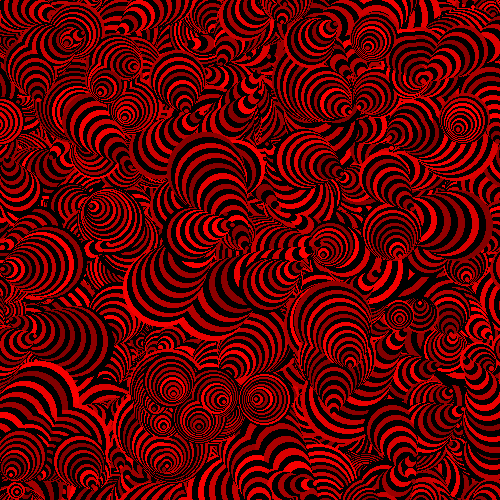

In [4]:
from perlin_noise import PerlinNoise

noise = PerlinNoise(octaves=10, seed=24)

nudge=0
w=500

im = Image.new('RGB', size=(w, w))
draw = ImageDraw.Draw(im)

numCircles = 100

for i in range(0, numCircles, 1):
    
    xStart = random.randint(-50, 550)
    yStart = random.randint(-50, 550)
    numRings = random.randint(5, 25)

    for x in range(numRings, 0, -1):
        for y in range(0, numRings, 1):

            # circle at midpoint mX, mY with diameter d
            # add the noise into the x, y calculations
            # the nudge then shifts the x, y slightly for each ring
            mX=2*w*noise([y/numRings,nudge,0])+xStart
            mY=2*w*noise([y/numRings,nudge,1])+yStart
            d=w*x/150
            r=d/2
            
            draw.ellipse(
                [(mX-r, mY-r), (mX+r, mY+r)],
#                fill=(random.randint(128, 255), 0, 0)
                fill=((random.randint(128, 255), 0, 0) if x%2 else (0, 0, 0))
            )
            
            # increasing the nudge moves the rings for each loop
            # very small numbers e.g. .00002 result in small shifts
            # larger numbers e.g. .0002 shift much more so don't even look like rings
            nudge+=.00002


im


